In [18]:
from astropy.io import fits
from astropy.visualization import astropy_mpl_style 
from  astropy.utils.data import get_pkg_data_filename
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.style.use(astropy_mpl_style)
fits_file = fits.open(r'C:\Users\lazar\OneDrive\Desktop\Nircam Carina\MAST_2023-09-26T2052\JWST\jw02731-o001_t017_nircam_clear-f090w\jw02731-o001_t017_nircam_clear-f090w_i2d.fits')

print(fits_file)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001968371E250>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000196D9E180D0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000196D9E18590>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000196D9E19110>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000196D9E19BD0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000196D9E1A610>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000196D9E1B010>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000196D9BF1BD0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000196D9E73BD0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000196D9E341D0>]


In [19]:
fits_file.info()

Filename: C:\Users\lazar\OneDrive\Desktop\Nircam Carina\MAST_2023-09-26T2052\JWST\jw02731-o001_t017_nircam_clear-f090w\jw02731-o001_t017_nircam_clear-f090w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     374   ()      
  1  SCI           1 ImageHDU        75   (14215, 8421)   float32   
  2  ERR           1 ImageHDU        10   (14215, 8421)   float32   
  3  CON           1 ImageHDU        10   (14215, 8421, 5)   int32   
  4  WHT           1 ImageHDU         9   (14215, 8421)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (14215, 8421)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (14215, 8421)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (14215, 8421)   float32   
  8  HDRTAB        1 BinTableHDU    824   160R x 407C   [23A, 5A, 3A, 45A, 7A, 13A, 7A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 32A, 21A, 3A, 3A, D, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 23A, 2A, 26A, 20A

In [20]:
fits_file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2023-06-22T23:36:14.786' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw02731-o001_t017_nircam_clear-f090w_i2d.fits' / Name of the file    
SDP_VER = '2023_1a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-061'      / S&OC PRD version number used in data processing
OSS_VER = '8.4.5.2 '           / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.10.1  '        

In [21]:
data = np.array(fits_file[1].data)

In [22]:
type(data)

numpy.ndarray

In [23]:
#image_data = fits.getdata(fits_file, ext=1)
image_data = fits_file[1].data
print(image_data.shape)

(8421, 14215)


Text(0.5, 1.0, 'NGC 3324')

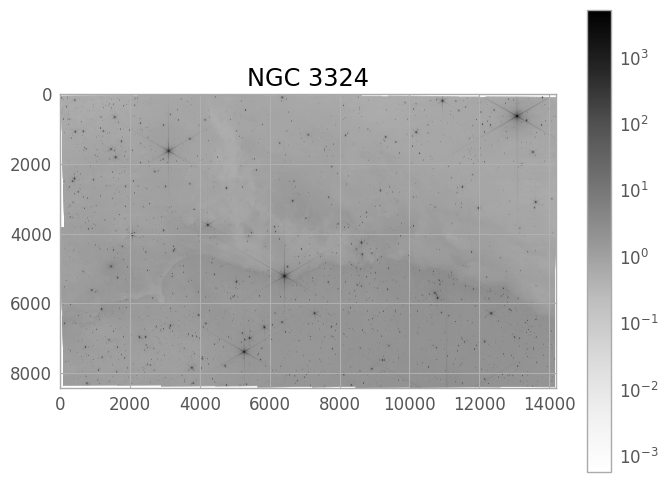

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(image_data, cmap= 'Greys', norm = LogNorm())
plt.colorbar()
plt.title("NGC 3324")


Text(0.5, 1.0, 'NGC 3324 (NIRcam 90W)')

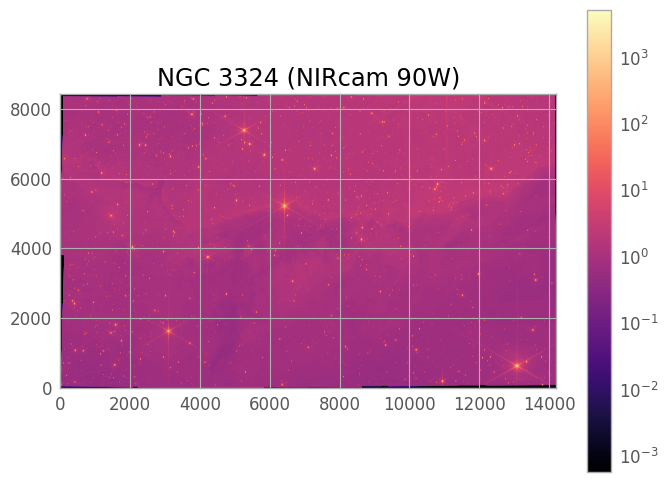

In [25]:
section1 = image_data[:8421, :14215]

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(section1, origin = 'lower', cmap= 'magma', norm = LogNorm())
plt.colorbar()
plt.title("NGC 3324 (NIRcam 90W)")

Text(0.5, 1.0, 'NGC 3324 (NIRcam 90W)')

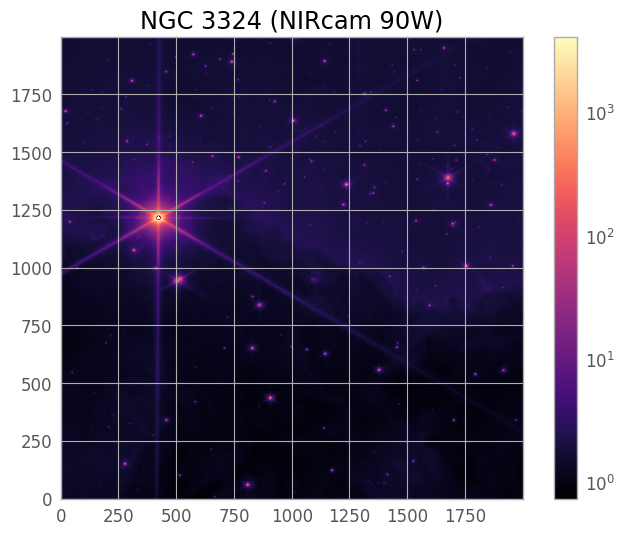

In [26]:
section1 = image_data[4000:6000, 6000:8000]

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(section1, origin = 'lower', cmap= 'magma', norm = LogNorm())
plt.colorbar()
plt.title("NGC 3324 (NIRcam 90W)")

In [27]:
from astropy.stats import sigma_clipped_stats

mean, median, std = sigma_clipped_stats(section1, sigma = 3.0)

print((mean, median, std))

(1.5821413, 1.6157292, 0.45374468)


In [28]:
from photutils.detection import DAOStarFinder

daofind = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std)

sources = daofind(section1-median)

for col in sources.colnames:
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'

sources.pprint(max_width = 76)

 id xcentroid ycentroid sharpness roundness1 ... sky    peak    flux   mag 
--- --------- --------- --------- ---------- ... ---- ------- ------- -----
  1    663.65     10.03      0.69      -0.24 ... 0.00   42.72   15.74 -2.99
  2    701.45     22.16      0.63      -0.12 ... 0.00    4.37    1.83 -0.66
  3   1010.30     26.51      0.61       0.20 ... 0.00    6.84    2.79 -1.11
  4    329.45     43.84      0.72      -0.08 ... 0.00    8.44    3.18 -1.26
  5   1177.96     48.04      0.74      -0.11 ... 0.00    2.55    1.15 -0.16
  6    810.38     51.35      0.42       0.75 ... 0.00    6.18    1.63 -0.53
  7    800.29     52.67      0.49       0.70 ... 0.00    5.92    1.81 -0.64
  8    798.99     56.85      0.62      -0.19 ... 0.00   15.85    4.54 -1.64
  9    813.92     56.85      0.64      -0.22 ... 0.00   13.52    3.66 -1.41
 10    834.99     59.58      0.68      -0.18 ... 0.00   13.56    4.82 -1.71
...       ...       ...       ...        ... ...  ...     ...     ...   ...
715   1284.3

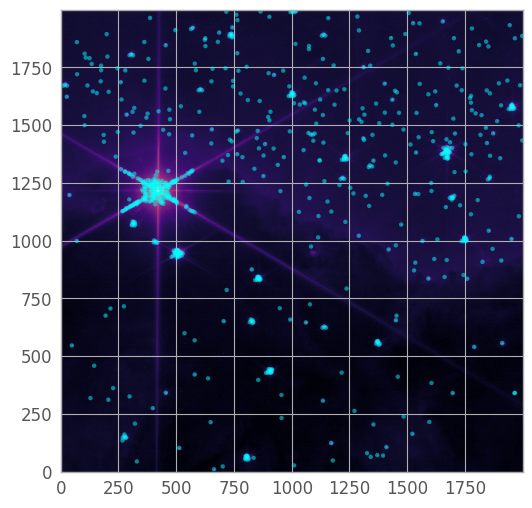

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r = 5.0)
plt.imshow(section1, cmap = 'magma', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')

apertures.plot(color = 'cyan', lw = 1.5, alpha  = 0.5);

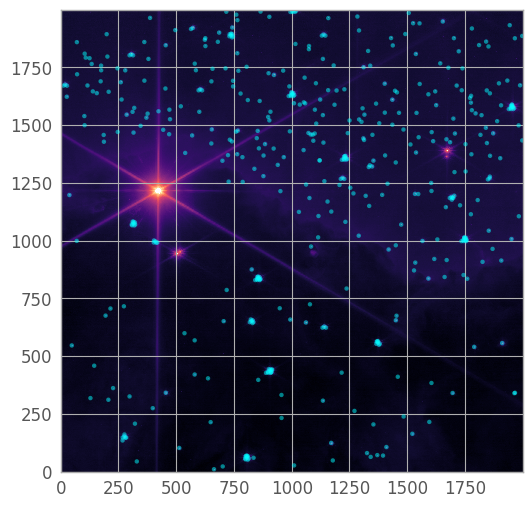

In [30]:
mask = np.zeros(section1.shape, dtype = bool)

mask[1100:1370, 200:625] = True
mask[1340:1420, 1600:1725] = True
mask[850:1000, 450:550] = True

sources = daofind(section1-median, mask = mask)
xpix = sources['xcentroid']
ypix = sources['ycentroid']

positions = np.transpose((xpix,ypix))
apertures = CircularAperture(positions, r = 5.0)
plt.imshow(section1, cmap = 'magma', norm = LogNorm(), origin = 'lower', interpolation = 'nearest')

apertures.plot(color = 'cyan', lw = 1.5, alpha  = 0.5);

In [31]:
print(apertures)

Aperture: CircularAperture
positions: [[ 663.64536546,   10.03113466],
            [ 701.45248301,   22.15930028],
            [1010.29610002,   26.50523056],
            [ 329.45494951,   43.84064494],
            [1177.96284787,   48.04153601],
            [ 810.37585381,   51.3528466 ],
            [ 800.28983705,   52.66963052],
            [ 798.9877212 ,   56.85328743],
            [ 813.9226329 ,   56.84645115],
            [ 834.99132029,   59.58440761],
            [ 806.4696056 ,   61.54214018],
            [1341.927944  ,   63.44782024],
            [ 800.264508  ,   65.63107869],
            [ 809.97823432,   66.75184656],
            [1395.407358  ,   69.10628309],
            [ 802.98106907,   68.6582099 ],
            [ 806.35542247,   68.35982998],
            [1370.47890398,   71.18786424],
            [1326.08213219,   80.0204691 ],
            [ 513.05335822,  102.25673822],
            [1409.89409622,  106.13174712],
            [1171.05075005,  123.99369429],
     

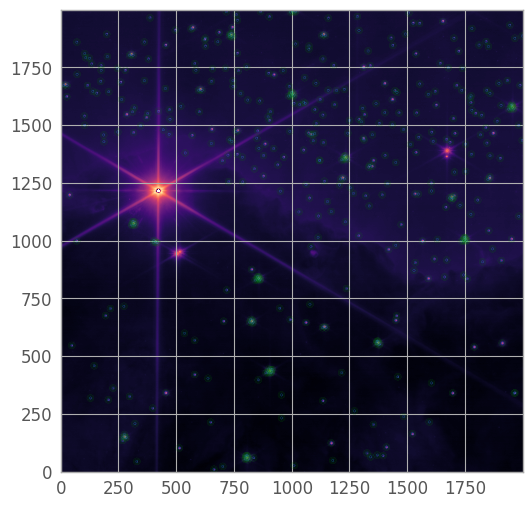

In [32]:
from photutils.aperture import CircularAnnulus, CircularAperture, ApertureStats, aperture_photometry

annulus_aperture = CircularAnnulus(positions, r_in = 10, r_out = 15)

plt.figure()
plt.imshow(section1, cmap = 'magma', norm = LogNorm(), origin = 'lower')
apertures.plot(color = 'cyan', lw = 0.1, alpha  = 1);
annulus_aperture.plot(color = 'green', lw = 0.1, alpha = 1);
plt.show()

In [33]:
aperstats = ApertureStats(section1, annulus_aperture)
bkg_mean = aperstats.mean
aperture_area = apertures.area_overlap(section1)
total_bkg = bkg_mean*aperture_area

star_data = aperture_photometry(section1, apertures)

star_data['total_bkg'] = total_bkg

for col in star_data.colnames:
    star_data[col].info.format = '%.8g'

star_data.pprint()

 id  xcenter   ycenter  aperture_sum total_bkg
       pix       pix                          
--- --------- --------- ------------ ---------
  1 663.64537 10.031135     333.8176 80.411318
  2 701.45248   22.1593    121.46072 88.440932
  3 1010.2961 26.505231    131.28952 80.257258
  4 329.45495 43.840645    137.08102 88.265935
  5 1177.9628 48.041536    92.034581 75.467489
  6 810.37585 51.352847    411.85142 2739.3504
  7 800.28984 52.669631    454.06178 2632.5355
  8 798.98772 56.853287    778.11485 675.89064
  9 813.92263 56.846451    675.24648 824.18258
 10 834.99132 59.584408    199.37599 129.15114
...       ...       ...          ...       ...
463 760.24822 1977.9397    192.07461 130.61172
464 1506.7624 1985.2556    202.78405 141.10374
465 1014.6879 1989.8994    567.83116 1289.8447
466 994.56771  1989.413    235.56611  356.6259
467  1004.207 1989.3678     432.4937 3056.4649
468 716.95293  1990.546    212.65522 125.62335
469 865.13735  1991.219    289.02583 129.24016
470 1002.8454

In [41]:
from acstools import acszpt

date = '2023-06-22'
instrument = 'HRC'
filter = 'F090W'

q = acszpt.Query(date = date, detector = instrument)
zpt_table = q.fetch()
q_filter = acszpt.Query(date = date, detector = instrument, filt = filter)
filter_zpt = q_filter.fetch()

print(filter_zpt)

ERROR:acszpt.Query:F090W is not a valid filter for HRC
Please choose one of the following:
F220W
F250W
F330W
F344N
F435W
F475W
F502N
F550M
F555W
F606W
F625W
F658N
F660N
F775W
F814W
F850LP
F892N
-------------------------------------------------------------------------------


None


In [2]:
# Manejo del cat.ecsv que aparece al lado del FITS file
from astropy.table import Table
import numpy as np
import pandas as pd
df = Table.read(r"C:\Users\lazar\OneDrive\Desktop\Nircam Carina\MAST_2023-09-26T2052\JWST\jw02731-o001_t017_nircam_clear-f090w\jw02731-o001_t017_nircam_clear-f090w_cat.ecsv")
print(df)

label xcentroid  ...              sky_bbox_ur              
                 ...                deg,deg                
----- ---------- ... --------------------------------------
    1  2388.5215 ...  159.1263374141501,-58.652005845316076
    2  4323.2553 ...  159.13397077235598,-58.63557582036244
    3  2408.4069 ...  159.12665067017147,-58.65184752686486
    4  6356.6338 ...    159.1459544833832,-58.6176955872888
    5  6502.9202 ... 159.14238196568473,-58.617120026949685
    6  4007.9538 ...  159.13303376269644,-58.63827195620332
    7  6186.2207 ...  159.14131585220943,-58.61980013569174
    8  7742.2916 ... 159.14741306476628,-58.606637678892135
    9  6862.4592 ...  159.14402090038885,-58.61412563389534
   10  7085.3285 ...   159.1450034974489,-58.61223219983533
  ...        ... ...                                    ...
 7763 10493.1870 ...  159.29376572181127,-58.60001041281351
 7764 10514.5907 ...  159.29384218180653,-58.59984076747817
 7765  9353.2175 ...  159.28951644303305

TypeError: Image data of dtype [('label', '<i8'), ('xcentroid', '<f8'), ('ycentroid', '<f8'), ('sky_centroid', 'O'), ('aper_bkg_flux', '<f8'), ('aper_bkg_flux_err', '<f8'), ('aper30_flux', '<f8'), ('aper30_flux_err', '<f8'), ('aper50_flux', '<f8'), ('aper50_flux_err', '<f8'), ('aper70_flux', '<f8'), ('aper70_flux_err', '<f8'), ('aper_total_flux', '<f8'), ('aper_total_flux_err', '<f8'), ('aper30_abmag', '<f8'), ('aper30_abmag_err', '<f8'), ('aper50_abmag', '<f8'), ('aper50_abmag_err', '<f8'), ('aper70_abmag', '<f8'), ('aper70_abmag_err', '<f8'), ('aper_total_abmag', '<f8'), ('aper_total_abmag_err', '<f8'), ('aper30_vegamag', '<f8'), ('aper30_vegamag_err', '<f8'), ('aper50_vegamag', '<f8'), ('aper50_vegamag_err', '<f8'), ('aper70_vegamag', '<f8'), ('aper70_vegamag_err', '<f8'), ('aper_total_vegamag', '<f8'), ('aper_total_vegamag_err', '<f8'), ('CI_50_30', '<f8'), ('CI_70_50', '<f8'), ('CI_70_30', '<f8'), ('is_extended', '?'), ('sharpness', '<f8'), ('roundness', '<f4'), ('nn_label', '<i8'), ('nn_dist', '<f8'), ('isophotal_flux', '<f8'), ('isophotal_flux_err', '<f4'), ('isophotal_abmag', '<f8'), ('isophotal_abmag_err', '<f8'), ('isophotal_vegamag', '<f8'), ('isophotal_vegamag_err', '<f8'), ('isophotal_area', '<f8'), ('semimajor_sigma', '<f8'), ('semiminor_sigma', '<f8'), ('ellipticity', '<f8'), ('orientation', '<f8'), ('sky_orientation', '<f8'), ('sky_bbox_ll', 'O'), ('sky_bbox_ul', 'O'), ('sky_bbox_lr', 'O'), ('sky_bbox_ur', 'O')] cannot be converted to float

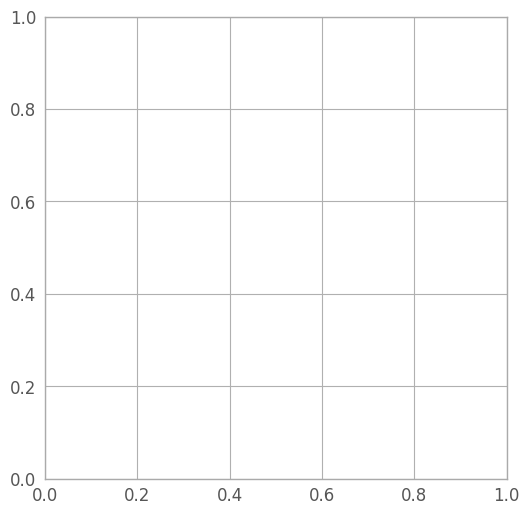

In [38]:
plt.figure()
plt.imshow(df, cmap= 'Greys', norm = LogNorm())
plt.colorbar()
plt.title("NGC 3324")
